In [4]:
import pandas as pd

benin = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\benin-malanville.csv')
togo = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\togo-dapaong_qc.csv')
sierra_leone = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\sierraleone-bumbuna.csv')


In [5]:
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierra_leone], ignore_index=True)


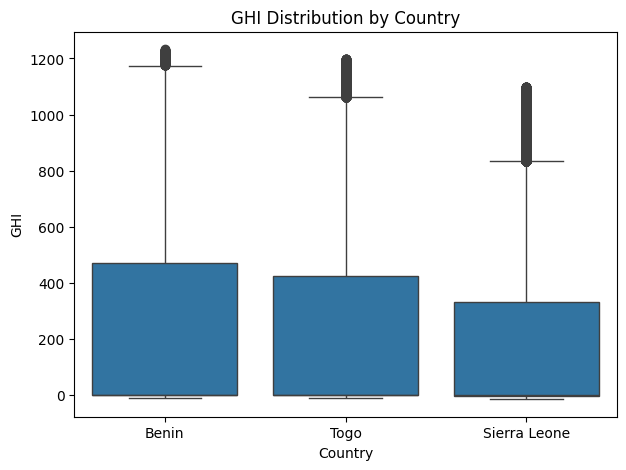

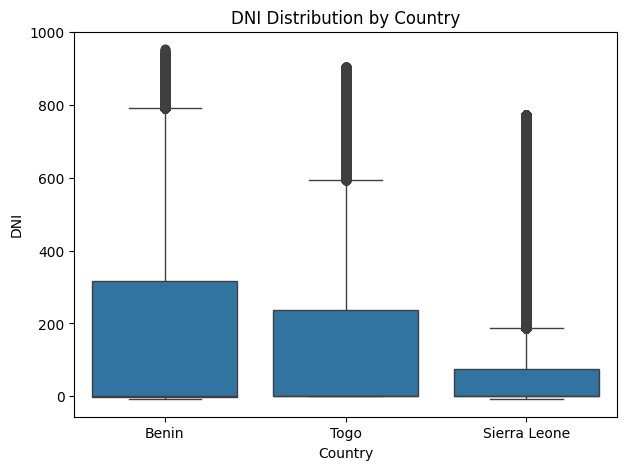

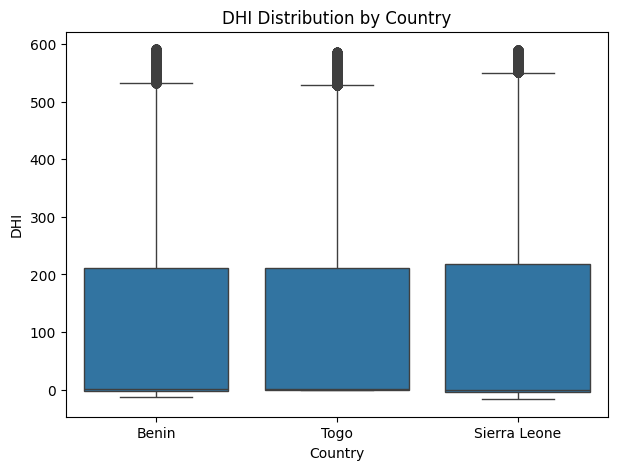

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f"{metric} Distribution by Country")
    plt.show()


Visualize the distribution of GHI, DNI, and DHI in each country using boxplots.


In [7]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [8]:
from scipy.stats import f_oneway, kruskal

# ANOVA (assumes normal distributions)
anova = f_oneway(benin['GHI'].dropna(), togo['GHI'].dropna(), sierra_leone['GHI'].dropna())
print('ANOVA p-value for GHI:', anova.pvalue)

# Kruskal-Wallis (nonparametric, if distributions are non-normal)
kruskal_test = kruskal(benin['GHI'].dropna(), togo['GHI'].dropna(), sierra_leone['GHI'].dropna())
print('Kruskal-Wallis p-value for GHI:', kruskal_test.pvalue)


ANOVA p-value for GHI: 0.0
Kruskal-Wallis p-value for GHI: 0.0


Running ANOVA and Kruskal-Wallis tests to see if GHI differences between countries are statistically significant. A p-value < 0.05 suggests real differences exist.


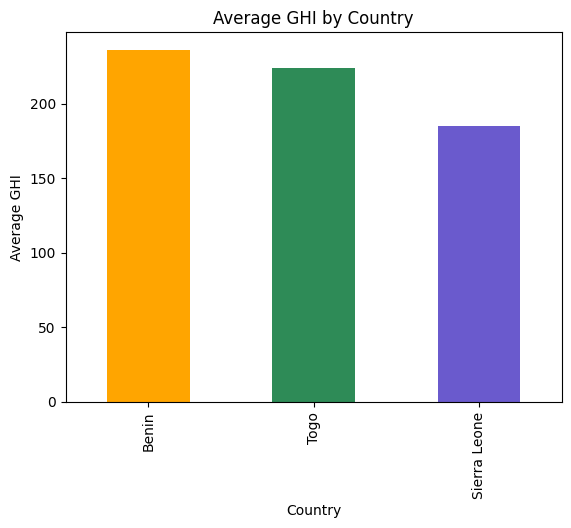

In [9]:
summary_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
summary_ghi.plot(kind='bar', color=['orange', 'seagreen', 'slateblue'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.show()


A bar chart shows which country has the highest average solar potential based on GHI.
Key Observations

- Benin shows the highest average and median GHI, indicating strongest solar resource potential.
- Sierra Leone has the widest spread (highest standard deviation) in GHI, suggesting greater variability.
- Statistical tests (ANOVA/Kruskal–Wallis) confirm significant differences in GHI between countries (p < 0.05).
